# DATA 1030 Project Midterm Report

In [1]:
import pandas as pd
import matplotlib
import sklearn
from matplotlib import pylab as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/Users/kingsley/Desktop/DATA1030/Data_1030_Project/data/EPL_data.csv')
df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [3]:
df.drop(df[df.Position == 'Goalkeeper'].index, inplace=True)
df=df.drop(['Name'],axis=1)

In [4]:
df=df.dropna(axis=1,how='all')

In [5]:
df.shape

(502, 50)

In [6]:
df.dtypes

Jersey Number             float64
Club                       object
Position                   object
Nationality                object
Age                       float64
Appearances                 int64
Wins                        int64
Losses                      int64
Goals                       int64
Goals per match           float64
Headed goals              float64
Goals with right foot     float64
Goals with left foot      float64
Penalties scored          float64
Freekicks scored          float64
Shots                     float64
Shots on target           float64
Shooting accuracy %        object
Hit woodwork              float64
Big chances missed        float64
Clean sheets              float64
Goals conceded            float64
Tackles                   float64
Tackle success %           object
Last man tackles          float64
Blocked shots             float64
Interceptions             float64
Clearances                float64
Headed Clearance          float64
Clearances off

In [7]:
df.isna().sum()

Jersey Number               6
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           193
Headed goals                0
Goals with right foot       0
Goals with left foot        0
Penalties scored          193
Freekicks scored          193
Shots                     193
Shots on target           193
Shooting accuracy %       193
Hit woodwork                0
Big chances missed        193
Clean sheets              309
Goals conceded            309
Tackles                     0
Tackle success %          112
Last man tackles          309
Blocked shots               0
Interceptions               0
Clearances                  0
Headed Clearance            0
Clearances off line       309
Recoveries                112
Duels won                 112
Duels lost                112
Successful

In [8]:
pd.set_option("display.max_columns", 100)
df['Shooting accuracy %'] = df['Shooting accuracy %'].str.rstrip('%').astype('float') / 100.0
df['Tackle success %'] = df['Tackle success %'].str.rstrip('%').astype('float') / 100.0
df['Cross accuracy %'] = df['Cross accuracy %'].str.rstrip('%').astype('float') / 100.0
df.describe()

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides
count,496.00000,501.000000,502.000000,502.000000,502.000000,502.000000,309.000000,502.000000,502.000000,502.000000,309.000000,309.000000,309.000000,309.000000,309.000000,502.000000,309.000000,193.000000,193.000000,502.000000,390.000000,193.000000,502.000000,502.000000,502.000000,502.000000,193.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,193.000000,390.000000,502.000000,502.000000,502.000000,502.000000,502.000000,390.000000,390.000000,390.000000,502.000000,502.000000,502.000000,502.000000
mean,19.34879,25.461078,71.159363,29.950199,24.691235,8.334661,2.648414,1.414343,4.468127,2.388446,0.974110,0.291262,102.504854,36.915858,0.286796,2.061753,9.029126,17.160622,79.031088,101.077689,0.526718,1.259067,20.551793,72.760956,141.627490,69.912351,1.036269,326.905128,313.815385,275.864103,49.253846,99.758974,84.848718,0.507772,0.741026,5.990040,2447.828685,27.182709,8.171315,121.920319,0.163077,8.576923,154.197436,8.804781,0.328685,60.231076,11.063745
std,14.08378,4.228591,82.015957,39.010919,28.662018,17.694670,8.002117,3.433374,11.048341,6.295652,3.355453,0.989862,144.955336,57.506911,0.187101,3.881757,16.614297,22.752521,94.705844,141.646209,0.279506,2.937763,32.334213,109.166771,306.460338,143.715038,1.940181,404.247950,388.337412,341.458793,74.374891,157.917760,109.751742,1.085507,1.349896,10.211237,3235.967959,18.907900,13.386715,244.916813,0.139455,20.113636,238.765235,12.026656,0.729705,77.933300,26.570058
min,2.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.00000,22.000000,6.000000,2.000000,2.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.190000,0.000000,0.000000,0.000000,3.000000,5.000000,0.490000,0.000000,0.000000,2.000000,3.000000,1.000000,0.000000,10.250000,12.000000,12.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,115.250000,13.247500,0.000000,2.000000,0.010000,0.000000,4.000000,0.000000,0.000000,3.250000,0.000000
50%,17.00000,25.000000,39.000000,13.000000,15.000000,2.000000,0.140000,0.000000,1.000000,0.000000,0.000000,0.000000,41.000000,12.000000,0.310000,0.000000,2.000000,7.000000,47.000000,45.000000,0.630000,0.000000,7.000000,26.000000,31.000000,13.000000,0.000000,174.000000,154.500000,145.500000,21.000000,28.500000,41.500000,0.000000,0.000000,2.000000,1107.500000,26.415000,3.000000,20.500000,0.180000,2.000000,59.500000,4.000000,0.000000,30.000000,2.000000
75%,26.25000,29.000000,111.750000,43.000000,36.750000,8.000000,0.390000,1.000000,3.000000,2.000000,0.000000,0.000000,144.000000,47.000000,0.390000,2.000000,11.000000,28.000000,123.000000,139.750000,0.697500,1.000000,27.000000,99.250000,147.000000,68.000000,1.000000,512.250000,489.000000,408.750000,58.750000,130.000000,119.500000,1.000000,1.000000,7.000000,3678.500000,39.697500,9.000000,107.750000,0.240000,7.750000,207.000000,12.750000,0.000000,82.750000,8.750000
max,82.00000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,27.00000

In [9]:
df.shape


(502, 50)

In [10]:
df['Goals per match']
df_w=df.loc[(df['Goals per match'] >= 2)]
df_w

,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides
16,25.0,Arsenal,Midfielder,Egypt,28.0,47,29,10,0,47.0,0.0,0.0,0.0,0.0,0.0,44.0,5.0,0.11,0.0,2.0,NaN,NaN,57.0,0.54,NaN,22.0,41.0,41.0,15.0,NaN,211.0,109.0,107.0,11.0,18.0,34.0,NaN,0.0,3,2532,53.87,2.0,30.0,0.13,4.0,83.0,7,1,24,2.0
18,29.0,Arsenal,Midfielder,France,21.0,57,24,17,0,57.0,0.0,0.0,0.0,0.0,0.0,27.0,9.0,0.33,1.0,1.0,NaN,NaN,75.0,0.56,NaN,11.0,59.0,58.0,29.0,NaN,284.0,263.0,217.0,47.0,31.0,40.0,NaN,1.0,1,2750,48.25,4.0,21.0,0.10,16.0,148.0,15,0,41,0.0
19,32.0,Arsenal,Midfielder,England,20.0,2,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,NaN,NaN,1.0,1.00,NaN,0.0,1.0,2.0,2.0,NaN,5.0,4.0,4.0,2.0,0.0,0.0,NaN,0.0,0,35,17.50,0.0,1.0,0.01,0.0,0.0,0,0,0,0.0
22,8.0,Arsenal,Midfielder,Spain,24.0,26,14,6,0,26.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0,0.21,0.0,0.0,NaN,NaN,49.0,0.51,NaN,6.0,37.0,14.0,9.0,NaN,163.0,127.0,129.0,30.0,12.0,26.0,NaN,0.0,3,1372,52.77,2.0,71.0,0.14,7.0,81.0,1,0,21,0.0
46,8.0,Aston-Villa,Midfielder,England,29.0,13,4,8,0,13.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.03,0.0,0.0,NaN,NaN,7.0,0.43,NaN,1.0,1.0,2.0,0.0,NaN,14.0,10.0,16.0,0.0,2.0,6.0,NaN,0.0,0,115,8.85,0.0,2.0,0.50,0.0,11.0,1,0,5,1.0
48,19.0,Aston-Villa,Midfielder,Zimbabwe,26.0,29,7,16,0,29.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.14,0.0,0.0,NaN,NaN,55.0,0.51,NaN,0.0,39.0,32.0,7.0,NaN,155.0,115.0,110.0,14.0,23.0,29.0,NaN,1.0,0,782,26.97,0.0,4.0,0.04,0.0,24.0,5,0,26,0.0
52,23.0,Aston-Villa,Midfielder,Spain,29.0,10,2,7,0,10.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.17,0.0,0.0,NaN,NaN,3.0,0.33,NaN,4.0,3.0,5.0,1.0,NaN,26.0,13.0,25.0,7.0,1.0,2.0,NaN,0.0,1,93,9.30,1.0,2.0,0.02,2.0,6.0,0,0,6,0.0
55,39.0,Aston-Villa,Forward,England,22.0,19,4,9,0,19.0,0.0,0.0,0.0,0.0,0.0,17.0,5.0,0.29,0.0,3.0,NaN,NaN,1.0,NaN,NaN,2.0,0.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,149,7.84,0.0,3.0,NaN,NaN,NaN,0,0,12,3.0
74,10.0,Brighton-and-Hove-Albion,Midfielder,Argentina,21.0,9,3,2,0,9.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.14,0.0,1.0,NaN,NaN,9.0,0.56,NaN,3.0,1.0,1.0,0.0,NaN,15.0,17.0,22.0,2.0,3.0,5.0,NaN,0.0,0,98,10.89,0.0,23.0,0.13,0.0,2.0,0,0,4,1.0
79,17.0,Brighton-and-Hove-Albion,Midfielder,Colombia,22.0,21,6,9,0,21.0,0.0,0.0,0.0,0.0,0.0,15.0,4.0,0.27,0.0,1.0,NaN,NaN,34.0,NaN,NaN,7.0,15.0,13.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,681,32.43,0.0,8.0,NaN,NaN,NaN,1,0,21,3.0


In [11]:
txt = "This figure shows a correlation between popularity groups and average keyword in avg share."
plt.figtext(0.5, -0.03, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('kw_avg_avg.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

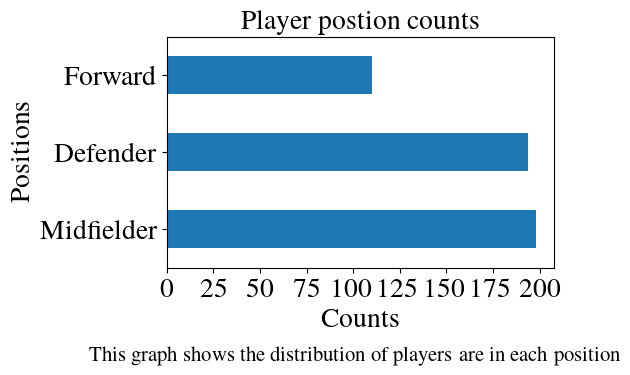

In [43]:
plt.rcParams['figure.figsize'] = [5,3]
X=df.loc[:, df.columns != 'Position']
y=df['Position']
# plt.figure(figsize=(5,3))
pd.value_counts(y).plot.barh()
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel('Positions',size=20)
plt.xlabel('Counts',size=20)
plt.title('Player postion counts',size=20)
txt="This graph shows the distribution of players are in each position"
plt.figtext(0.5, -0.2, txt, ha='center',size=15)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/kingsley/Desktop/DATA1030/Data_1030_Project/figures/player position coounts.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

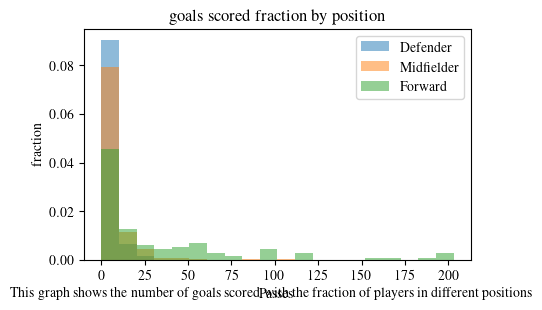

In [13]:

categories = df['Position'].unique()
bin_range = (df['Offsides'].min(),df['Offsides'].max())

for c in categories:
    plt.hist(df[df['Position']==c]['Offsides'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)

plt.legend()
plt.ylabel('fraction')
plt.xlabel('Passes')
plt.title('goals scored fraction by position')
txt="This graph shows the number of goals scored with the fraction of players in different positions "
plt.figtext(0.5, -0.01, txt, ha='center')
plt.show()

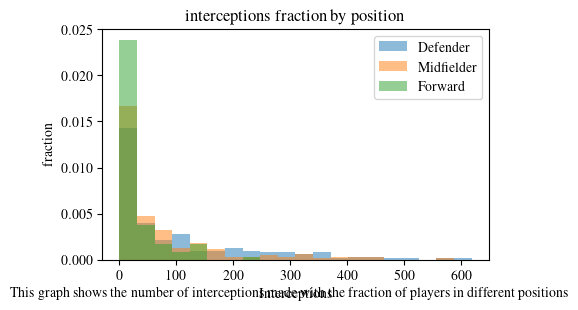

In [14]:
categories = df['Position'].unique()
bin_range = (df['Interceptions'].min(),df['Interceptions'].max())

for c in categories:
    plt.hist(df[df['Position']==c]['Interceptions'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Interceptions')
plt.title('interceptions fraction by position')
txt="This graph shows the number of interceptions made with the fraction of players in different positions "
plt.figtext(0.5, -0.01, txt, ha='center')
plt.show()

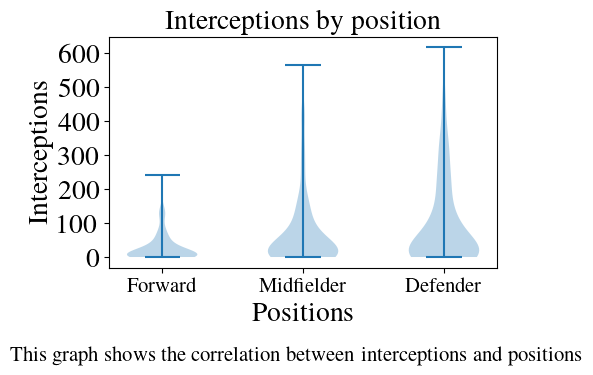

In [42]:
dataset = [df[df['Position']=='Forward']['Interceptions'].values,
           df[df['Position']=='Midfielder']['Interceptions'].values,
            df[df['Position']=='Defender']['Interceptions'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Forward','Midfielder','Defender'],size=15)
plt.ylabel('Interceptions',size=20)
plt.yticks(size=20)
plt.xlabel('Positions',size=20)
plt.title('Interceptions by position',size=20)

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
txt="This graph shows the correlation between interceptions and positions"
plt.figtext(0.5, -0.2, txt, ha='center',size=15)

plt.savefig('/Users/kingsley/Desktop/DATA1030/Data_1030_Project/figures/interception position.png', format='png', bbox_inches="tight", dpi=300)

plt.show()

In [23]:
count_matrix = df.groupby(['Jersey Number', 'Position']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Position       Defender   Forward  Midfielder
Jersey Number                                
2.0            1.000000       NaN         NaN
3.0            0.937500       NaN    0.062500
4.0            0.666667  0.055556    0.277778
5.0            0.833333       NaN    0.166667
6.0            0.611111       NaN    0.388889
...                 ...       ...         ...
69.0                NaN       NaN    1.000000
71.0           1.000000       NaN         NaN
72.0           1.000000       NaN         NaN
76.0           1.000000       NaN         NaN
82.0                NaN       NaN    1.000000

[64 rows x 3 columns]


<Figure size 500x300 with 0 Axes>

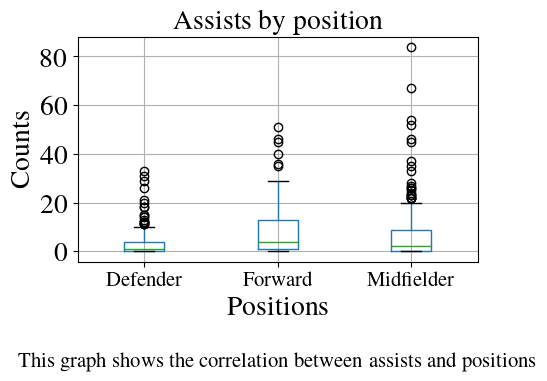

In [40]:
plt.figure(figsize=(5,3))

df[['Assists','Position']].boxplot(by='Position')
plt.ylabel('Counts',size=20)
plt.xlabel('Positions',size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.title('Assists by position',size=20)
plt.suptitle('')
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
txt="This graph shows the correlation between assists and positions"
plt.figtext(0.5, -0.2, txt, ha='center',size=15)

plt.savefig('/Users/kingsley/Desktop/DATA1030/Data_1030_Project/figures/assists position.png', format='png', bbox_inches="tight", dpi=300)

plt.show()

In [ ]:
#plt.figure(figsize=(1000,1000))
#plt.rcParams["figure.figsize"] = (10,8)
#count_matrix_norm.plot(kind='bar', stacked=True)
#plt.ylabel('fraction of people in group')
#plt.legend(loc=6)
#plt.show()

In [ ]:
# what we did before: variance in balance on the order of 1%
random_state = 42


X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
#print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(X_train.shape)
    print(y_train.shape)
    print(X_val.shape)
    print(y_val.shape)
#     print(X_train.head())
#     print(y_train.head())
#     print(X_val.head())
#     print(y_val.head())

In [ ]:
X.columns

In [ ]:
# collect which encoder to use on each feature
# needs to be done manually
onehot_ftrs = ['Jersey Number', 'Club', 'Nationality']
minmax_ftrs = ['Age']
std_ftrs = ['Appearances',
       'Wins', 'Losses', 'Goals', 'Goals per match', 'Headed goals',
       'Goals with right foot', 'Goals with left foot', 'Penalties scored',
       'Freekicks scored', 'Shots', 'Shots on target','Shooting accuracy %',
       'Hit woodwork', 'Big chances missed', 'Clean sheets', 'Goals conceded',
       'Tackles', 'Tackle success %', 'Last man tackles', 'Blocked shots',
       'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Passes',
       'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls',
       'Yellow cards', 'Red cards', 'Fouls', 'Offsides']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
#print(X_train_prep)





# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = preprocessor.transform(X_val)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)


In [ ]:
df['Shooting accuracy %']